In [1]:
import math
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import mediapipe as mp
from time import time

In [2]:
# initialize mediapipe pose class
mp_pose = mp.solutions.pose

# setting up the pose function
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.3, model_complexity=2)

# intialize the drawing class, useful for annotating the image
mp_drawing = mp.solutions.drawing_utils

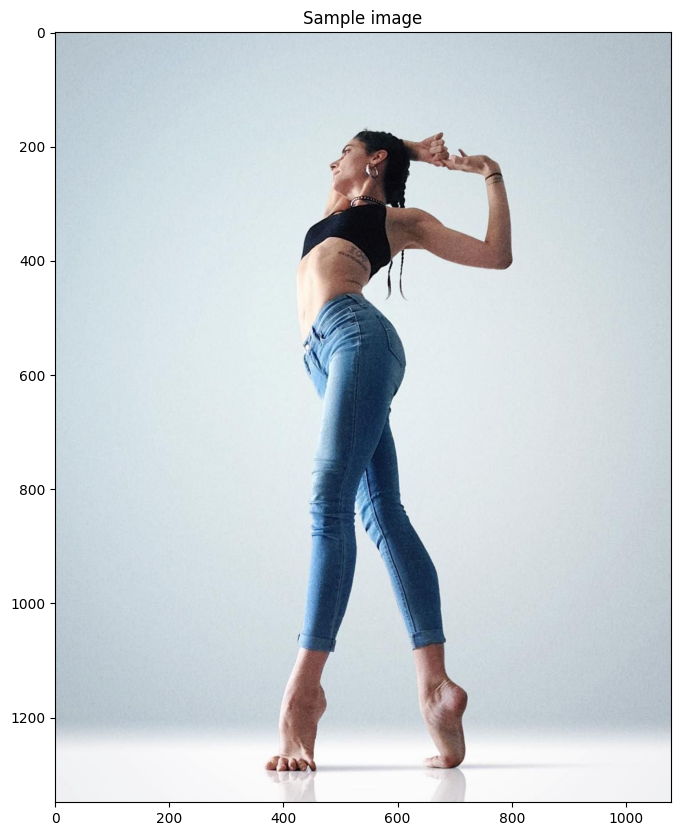

In [3]:
# read an image
sample_img = cv.imread('806868d2acfca349f460a1b3d9c2c6e4.jpg')

# specify a size of the figure
plt.figure(figsize=[10,10])

# display the image
plt.title('Sample image'); plt.imshow(sample_img[:,:,::-1]); plt.show()

In [4]:
# perform pose detection after converting the image to RGB
results = pose.process(cv.cvtColor(sample_img, cv.COLOR_BGR2RGB))

# check if any landmarks are found
if results.pose_landmarks:
    
    # iterate 2 items as we only want to display first 2 landmarks
    for i in range(2):
        
        # display the found normalized landmarks
        print(f'{mp_pose.PoseLandmark(i).name}:\n{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value]}')

NOSE:
x: 0.455604315
y: 0.167362988
z: 0.27259469
visibility: 0.99992764

LEFT_EYE_INNER:
x: 0.474284828
y: 0.159702241
z: 0.272144049
visibility: 0.999974



In [5]:
# retrieve the image height and width
image_height, image_width, _ = sample_img.shape

# check if any landmarks are found
if results.pose_landmarks:
    
    # iterate 2 items as we only want to display first 2 landmarks
    for i in range(2):
        
        # display the found landmarks after converting them to their original scale
        print(f'{mp_pose.PoseLandmark(i).name}:')
        print(f'x: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].x * image_width}')
        print(f'y: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].y * image_height}')
        print(f'z: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].z * image_width}')
        print(f'visibility: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].visibility}')

NOSE:
x: 492.0526599884033
y: 225.77267080545425
z: 294.40226554870605
visibility: 0.9999276399612427
LEFT_EYE_INNER:
x: 512.2276139259338
y: 215.43832367658615
z: 293.91557335853577
visibility: 0.9999740123748779


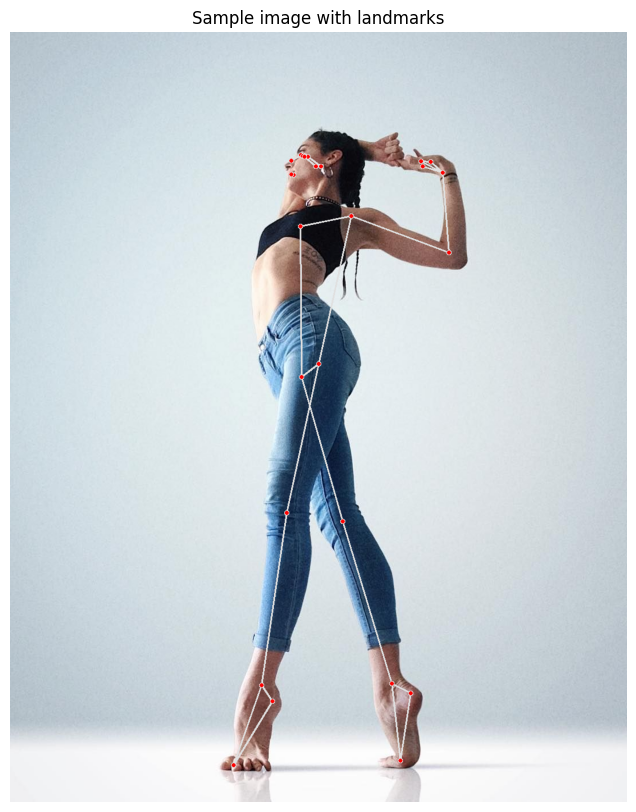

In [6]:
# create a copy of the sample image to draw the landmarks
img_copy = sample_img.copy()

# check if any landmarks are found
if results.pose_landmarks:
    
    # draw the landmarks on the image
    mp_drawing.draw_landmarks(img_copy, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
    
    # specify a size of the figure
    plt.figure(figsize=[10,10])
    
    # display the image with landmarks
    plt.title('Sample image with landmarks');plt.axis('off'); plt.imshow(img_copy[:,:,::-1]); plt.show()

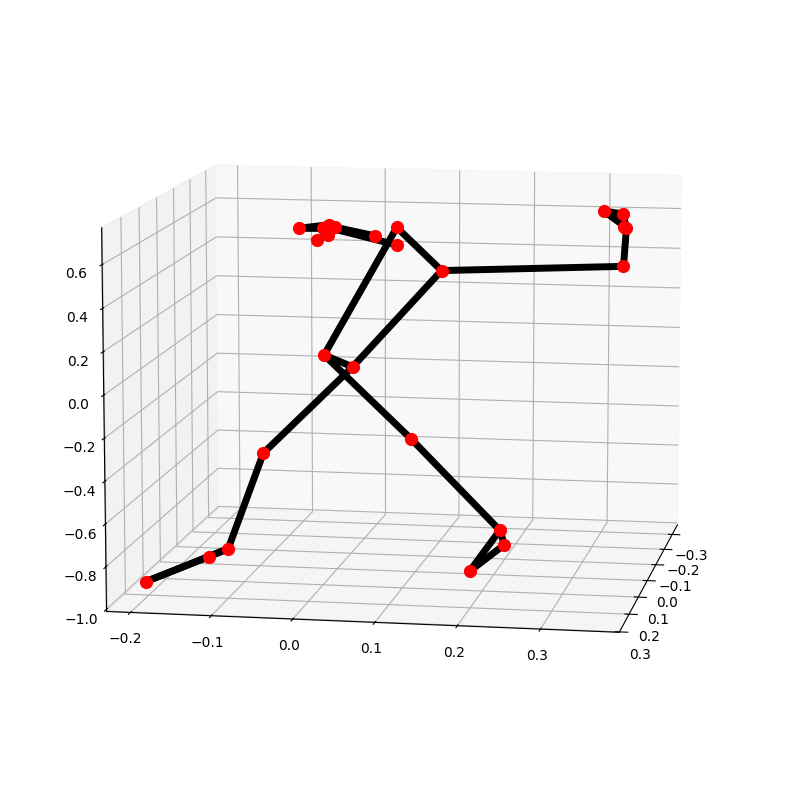

In [7]:
# plot landmarks in 3D
mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

In [8]:
# create a pose detection function
def detectPose(image, pose, display = True):
    # create a copy of the image
    outout_image = image.copy()
    # convert the image to RGB
    imageRGB = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    # perform pose detection
    results = pose.process(imageRGB)
    # retrieve the height and width of the input image
    height, width, _ = image.shape
    # initialize a list to store the landmarks
    landmarks = []
    # check if any landmarks are detected
    if results.pose_landmarks:
        # draw the landmarks on the output image
        mp_drawing.draw_landmarks(outout_image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
        # iterate over all the detected landmarks
        for landmark in results.pose_landmarks.landmark:
            # append the landmark coordinates to the list
            landmarks.append((int(landmark.x * width), int(landmark.y * height), (landmark.z * width)))
            
    # check if the original input image and the result image are specified to be displayed
    if display:
        # specify a size of the figure
        plt.figure(figsize=[22,22])
        plt.subplot(121); plt.imshow(image[:,:,::-1]); plt.title('Input image'); plt.axis('off'); 
        plt.subplot(122); plt.imshow(outout_image[:,:,::-1]); plt.title('Output image'); plt.axis('off');
        
        # also display the pose landmarks in 3D
        mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)
        
    else:
        # return the output image and landmarks
        return outout_image, landmarks

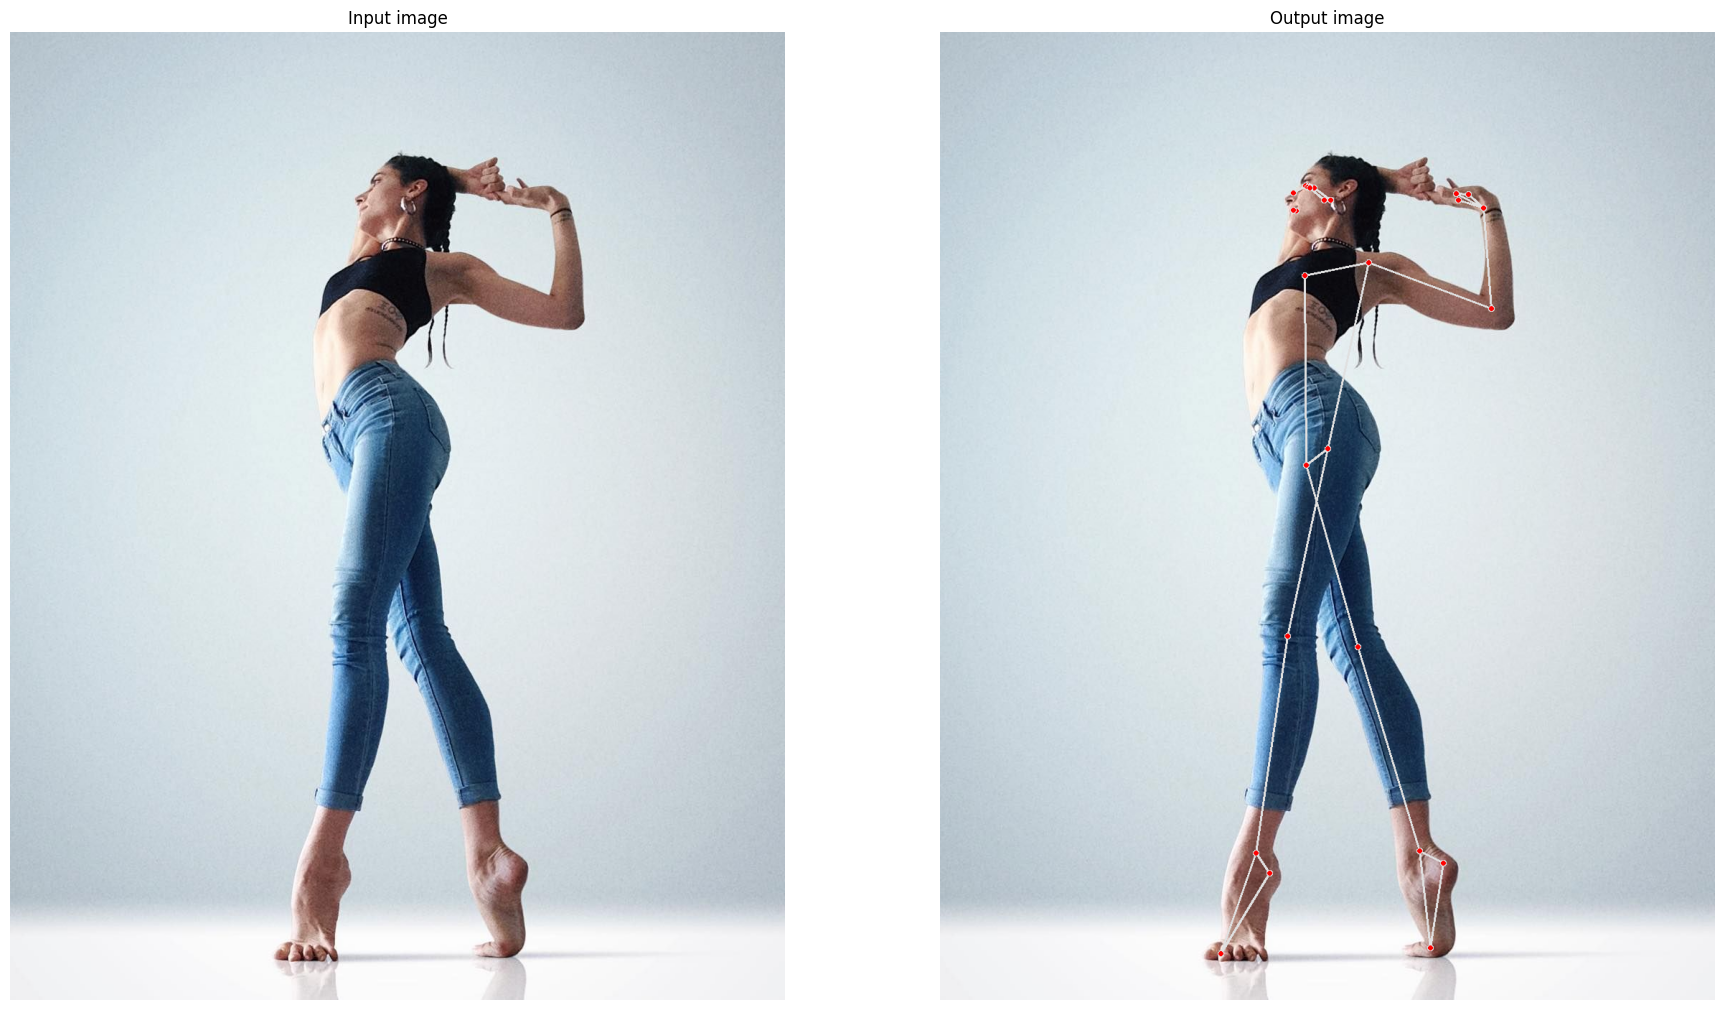

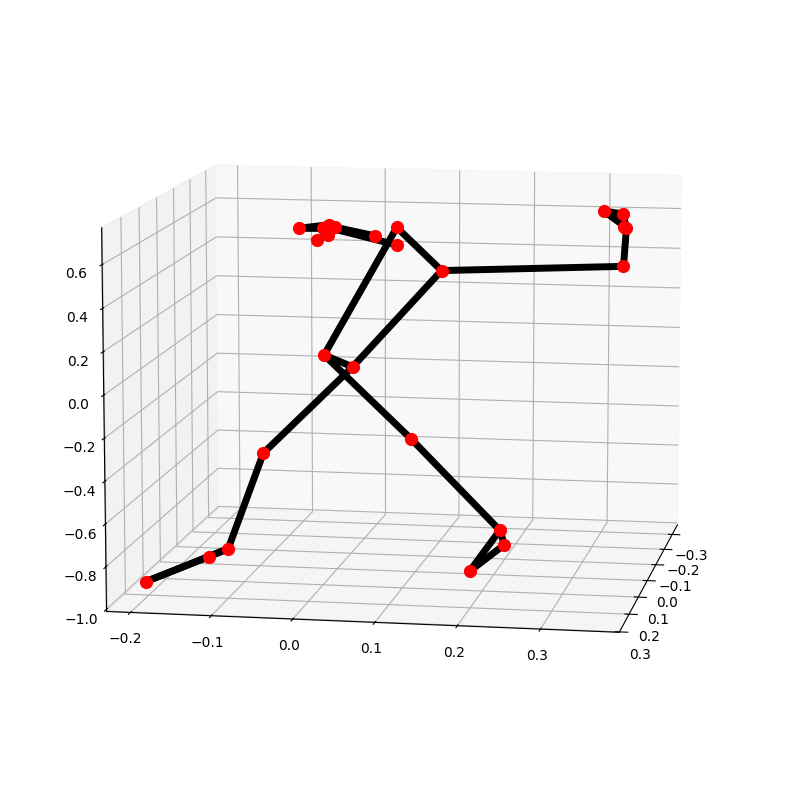

In [10]:
image = cv.imread('806868d2acfca349f460a1b3d9c2c6e4.jpg')
detectPose(image, pose, display = True)

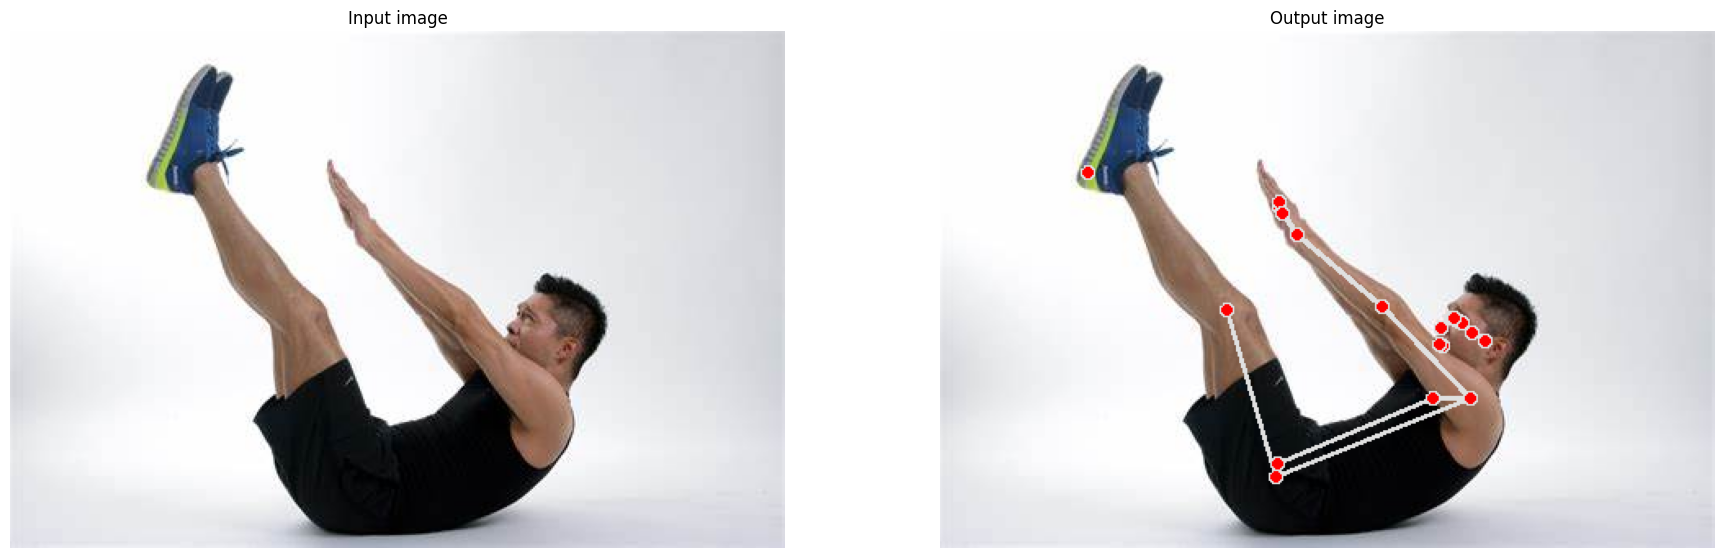

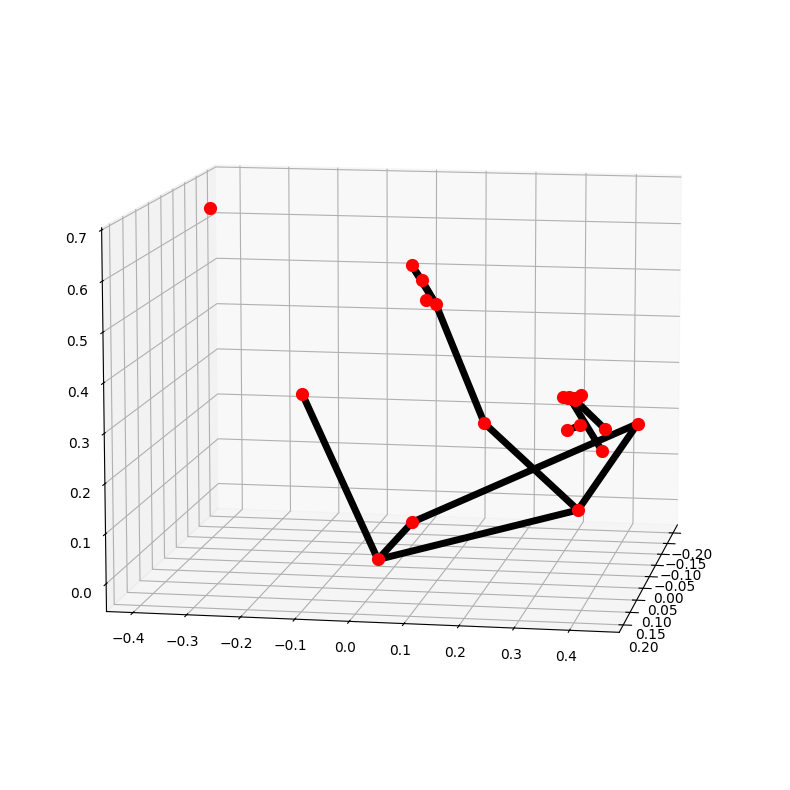

In [11]:
image = cv.imread('OIP.jpg')
detectPose(image, pose, display = True)

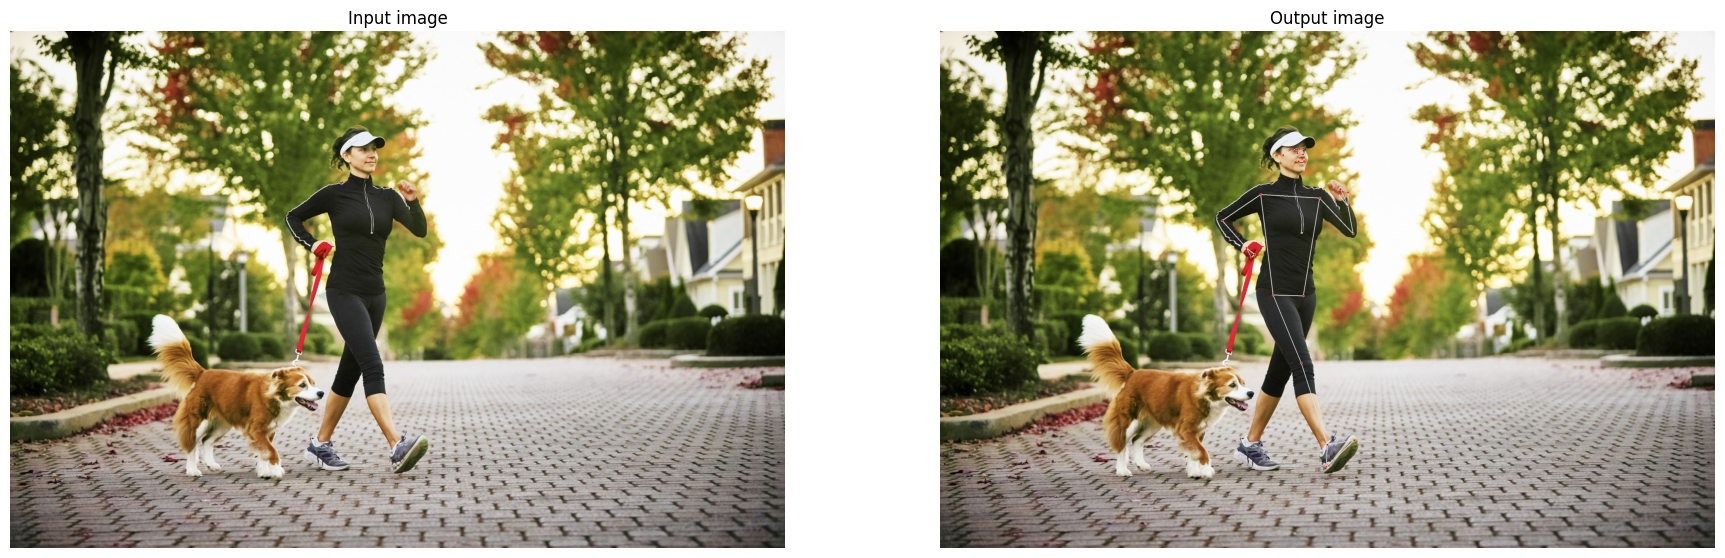

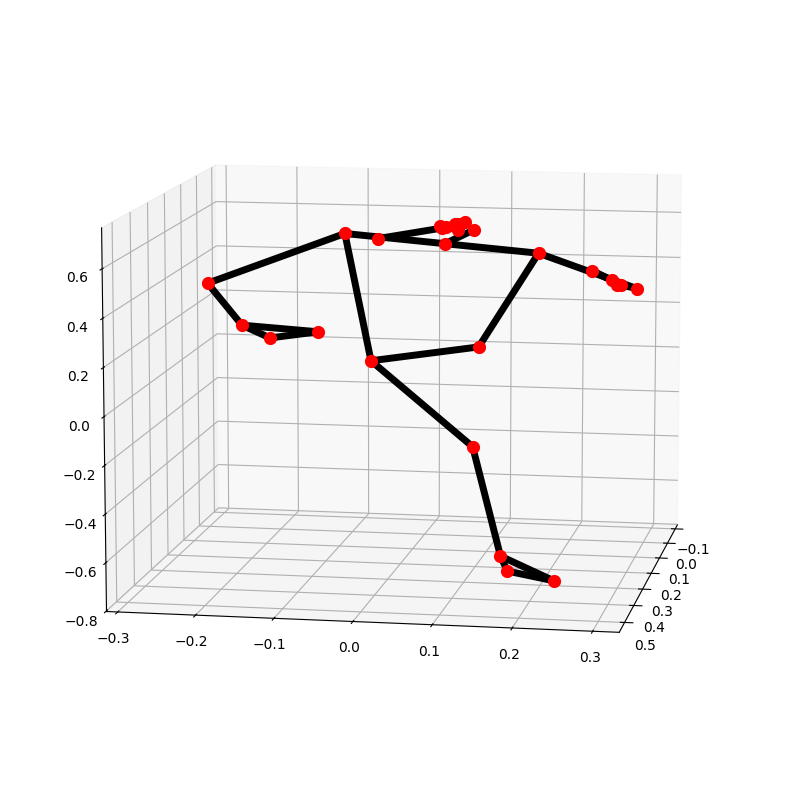

In [12]:
image = cv.imread('brisk-walking-dog-stevecoleimages-Eplus-GettyImages-513230162-5728c4c73df78ced1fcbdd0e.jpg')
detectPose(image, pose, display = True)

In [9]:
# pose detection on a video, real-time webcam
pose_video = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.5, model_complexity=1)

# initialize the videocapture object 
video = cv.VideoCapture(0)

# create named window for resizing purposes
cv.namedWindow('Pose detection', cv.WINDOW_NORMAL)

# intialize the videocapture object to read from a video 

# set camera resolution
video.set(3, 1280)
video.set(4, 960)

# intialize a variable to store the previous time
time1 = 0

# loop through the video frames
while video.isOpened():
    
    # read the video frame
    ok, frame = video.read()
    # check if frame is not read properly
    if not ok:
        break
    
    # flip the frame horizontally
    frame = cv.flip(frame, 1)
    # get the width and height of the frame
    frame_height, frame_width, _ = frame.shape
    # resize the frame while keeping the aspect ratio
    frame = cv.resize(frame, (int(frame_width * (640/frame_height)), 640))
    # perform pose detection
    frame, _ = detectPose(frame, pose_video, display = False)
    # set the time for this frame to the current time
    time2 = time()
    # check if the time difference is greater than 0
    if time2 - time1 > 0:
        # calculate the frames per second
        fps = 1/(time2 - time1)
        # write the calculated frames per second on the frame
        cv.putText(frame, f'FPS: {int(fps)}', (20, 40), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        
    # update the previous time to the current time
    # as this frame will become the previous frame for the next iteration
    time1 = time2
    
    # display the frame
    cv.imshow('Pose detection', frame)
    
    # wait until a key is pressed
    k = cv.waitKey(1) & 0xFF 
    # check if 'ESC' is pressed
    if k == 27:
        # break the loop
        break
    
# release the video object
video.release()

# close window
cv.destroyAllWindows()

### Pose Classification with Angle Heuristics

In [10]:
# create a function to calculate angle between landmarks
def calculateAngle(landmark1, landmark2, landmark3):
    x1, y1, _ = landmark1
    x2, y2, _ = landmark2
    x3, y3, _ = landmark3
    
    # calculate the angle between the 3 landmarks
    angle = math.degrees(math.atan2(y3 - y2, x3 - x2) - math.atan2(y1 - y2, x1 - x2))
    
    # check if the angle is negative
    if angle < 0:
        # add 360 to the angle
        angle += 360
        
    # return the angle
    return angle

In [11]:
angle = calculateAngle((558, 326, 0), (642, 333, 0), (718, 321, 0))
print(f'Angle between the 3 landmarks: {angle}')

Angle between the 3 landmarks: 166.26373169437744


In [12]:
# create a function to perform pose claasification
# Warrior II pose
# T pose
# Tree pose

def classifyPose(landmarks, output_image, display=False):
    # initialize the pose label from start
    label = 'Unknown'
    # specify the color (red) with which the pose will be annotated
    color = (0, 0, 255)
    # calculate the required angles for the poses
    #-------------------------------------------------------------------------------------------------------------------
    # left elbow angle between left shoulder, left elbow, and left wrist landmarks
    left_elbow_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                        landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                        landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value])
    # right elbow angle between right shoulder, right elbow, and right wrist landmarks
    right_elbow_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                        landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value],
                                        landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value])
    # left elbow, shoulder, and hip angle
    left_shoulder_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                             landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                             landmarks[mp_pose.PoseLandmark.LEFT_HIP.value])
    # right elbow, shoulder, and hip angle
    right_shoulder_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                              landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                              landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value])
    # left knee, hip, and ankle angle
    left_knee_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_HIP.value],
                                       landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value],
                                       landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value])
    # right knee, hip, and ankle angle
    right_knee_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                        landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value],
                                        landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value])
    # -------------------------------------------------------------------------------------------------------------------
    # check if the pose is Warrior II or T pose
    # because both of them have both arms should be straight, shoulder should be at the specific angle.
    # check if both arms are straight
    if left_elbow_angle > 165 and left_elbow_angle < 195 and right_elbow_angle > 165 and right_elbow_angle < 195:
        # check if the shoulder are at the required angle
        if left_shoulder_angle > 80 and left_shoulder_angle < 110 and right_shoulder_angle > 80 and right_shoulder_angle < 110:
            # check if it is Warrior II pose
            # check one leg is straight
            if left_knee_angle > 165 and left_knee_angle < 195 or right_knee_angle > 165 and right_knee_angle < 195:
                # check if the other leg is bended at the required angle
                if left_knee_angle > 90 and left_knee_angle < 120 or right_knee_angle > 90 and right_knee_angle < 120:
                    # update the pose label
                    label = 'Warrior II pose'
                    
            # check if it is T pose
            # check if both legs are straight
            if left_knee_angle > 160 and left_knee_angle < 195 and right_knee_angle > 160 and right_knee_angle < 195:
                # update the pose label
                label = 'T pose'
    # -------------------------------------------------------------------------------------------------------------------
    
    # check if the pose is Tree pose
    if left_knee_angle > 165 and left_knee_angle < 195 or right_knee_angle > 165 and right_knee_angle < 195:
        if left_knee_angle > 315 and left_knee_angle < 335 or right_knee_angle > 25 and right_knee_angle < 45:
            label = 'Tree pose'        
    # -------------------------------------------------------------------------------------------------------------------
    # check if the pose is classiified successfully
    if label != 'Unknown':
        # update the color to green
        color = (0, 255, 0)
    
    # write the label on the output image
    cv.putText(output_image, label, (20, 40), cv.FONT_HERSHEY_PLAIN, 2, color, 2)
    
    # check if the resultant image is specified to be displayed
    if display:
        # display the resultant image
        plt.figure(figsize=[10,10])
        plt.imshow(output_image[:,:,::-1]); plt.title("output image"); plt.axis('off');
    else: 
        # return the output image
        return output_image, label

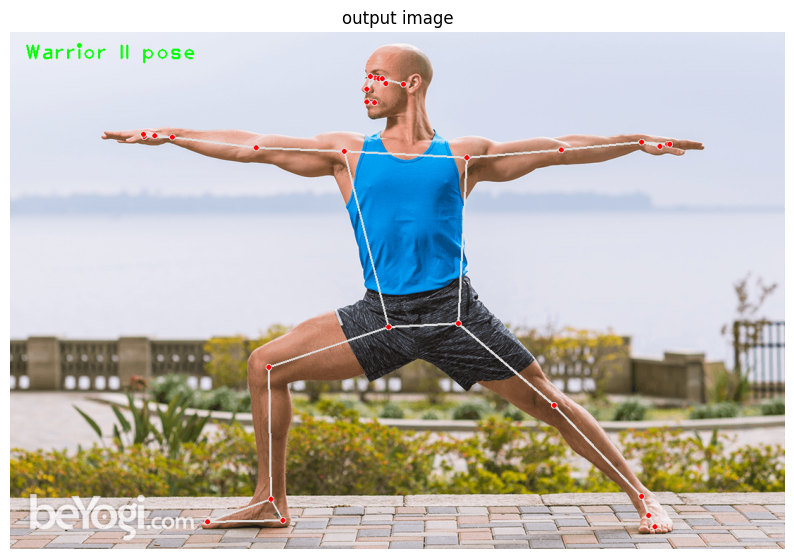

In [13]:
# test
image = cv.imread('Warrior-2-Pose-Virabhadrasana-II.png')
output_image, landmarks = detectPose(image, pose, display = False)
if landmarks:
    classifyPose(landmarks, output_image, display = True)

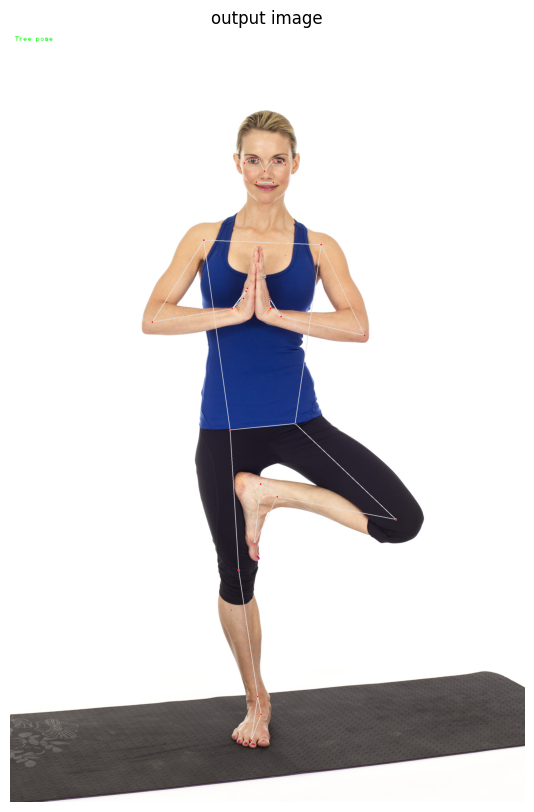

In [14]:
image = cv.imread('Tree-pose.jpg')
output_image, landmarks = detectPose(image, mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5, model_complexity=0), display = False)
if landmarks:
    classifyPose(landmarks, output_image, display = True)

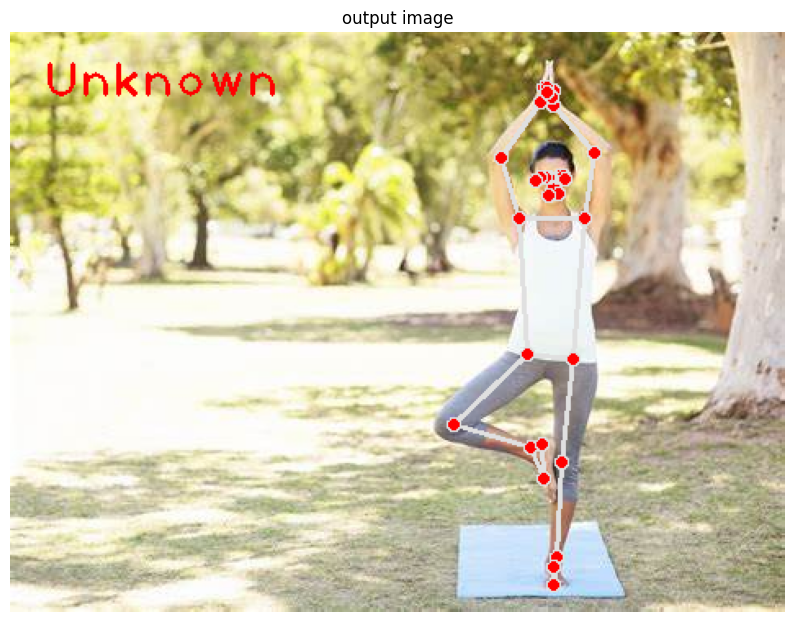

In [15]:
image = cv.imread('tree_pose_2.jpg')
output_image, landmarks = detectPose(image, mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5, model_complexity=0), display = False)
if landmarks:
    classifyPose(landmarks, output_image, display = True)


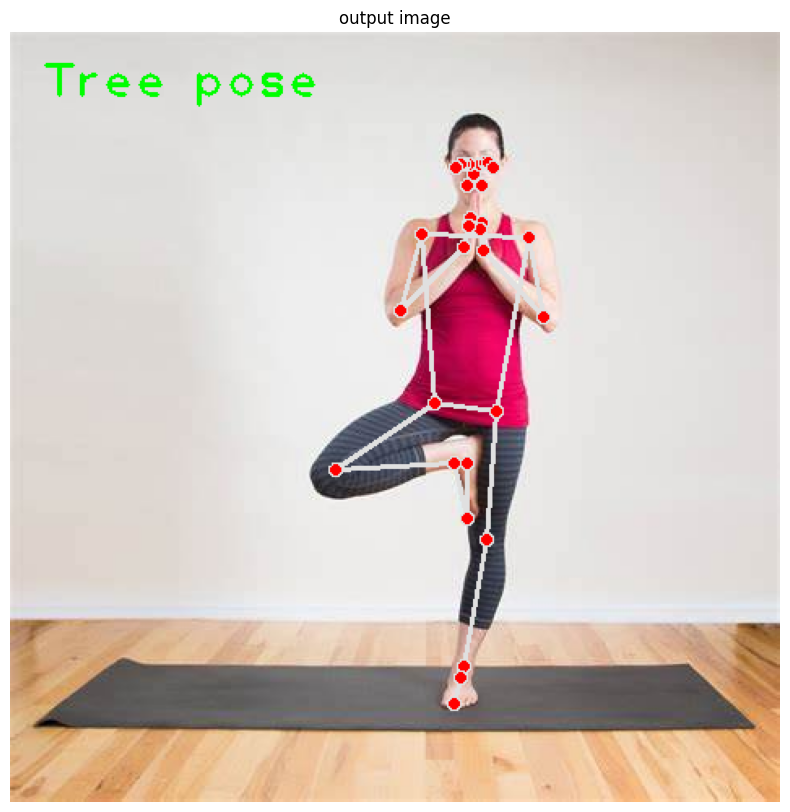

In [16]:
image = cv.imread('tree_pose.jpg')
output_image, landmarks = detectPose(image, mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5, model_complexity=0), display = False)
if landmarks:
    classifyPose(landmarks, output_image, display = True)


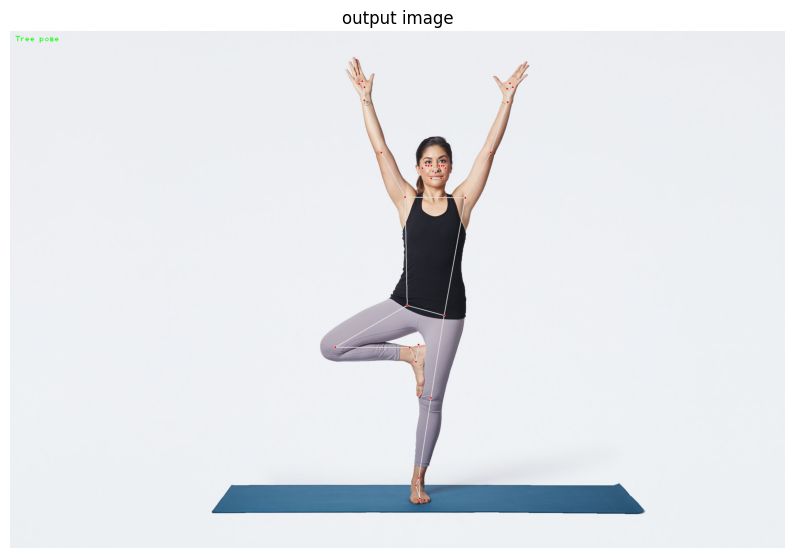

In [17]:
image = cv.imread('About-50-4111744-Tree-Pose02-641-5c4b762cc9e77c00016f33b6.jpg')
output_image, landmarks = detectPose(image, mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5, model_complexity=0), display = False)
if landmarks:
    classifyPose(landmarks, output_image, display = True)


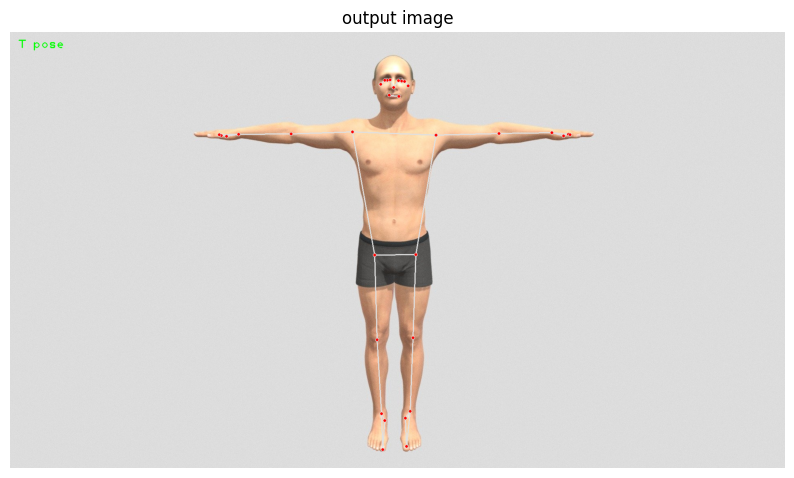

In [18]:
image = cv.imread('283362ace4384ef7bc164f524931fe97.jpeg')
output_image, landmarks = detectPose(image, pose, display = False)
if landmarks:
    classifyPose(landmarks, output_image, display = True)

In [23]:
# pose classification on real-time webcam
pose_video = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.5, model_complexity=1)

camera_video = cv.VideoCapture(0)
camera_video.set(3, 1280)
camera_video.set(4, 960)

cv.namedWindow('Pose classification', cv.WINDOW_NORMAL)

while camera_video.isOpened():
    ok, frame = camera_video.read()
    if not ok:
        continue
    
    frame = cv.flip(frame, 1)
    frame_height, frame_width, _ = frame.shape
    frame = cv.resize(frame, (int(frame_width * (640/frame_height)), 640))
    
    frame, landmarks = detectPose(frame, pose_video, display = False)
    
    if landmarks:
        frame, label = classifyPose(landmarks, frame, display = False)
    
    cv.imshow('Pose classification', frame)
    
    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break
    
# release the videocapture object and close the window
camera_video.release()
cv.destroyAllWindows()